> [nbdoc](https://github.com/outerbounds/nbdoc) is a lightweight version of [nbdev](https://github.com/fastai/nbdev) that allows you to create rich, testable content with notebooks.  [Docusarus](https://docusaurus.io/) is a beautiful static site generator for code documentation and blogging.  This project brings all of these together to give you a powerful documentation system.

## Setup

1. Follow the [Getting Started guide in the README](https://github.com/outerbounds/nbdoc-docusaurus#getting-started) to install and configure things appropriately.

2. Next, create an isolated python environment using your favorite tool such as `conda`, `pipenv`, `poetry` etc.  Then, from the root of this repo run this command in the terminal:

    ```sh
    make install
    ```

2. Then you need to open 3 different terminal windows (I recommend using split panes), and run the following commands in three seperate windows:

    _Note: we tried to use docker-compose but had trouble getting some things to run on Apple Silicon, so this will have to do for now._

    Start the docs server:

    ```shell
    make docs
    ```

    Watch for changes to notebooks:

    ```sh
    make watch
    ```

    Start Jupyter Lab:

    ```sh
    make nb
    ```

3. Open a browser window for this tutorial [http://localhost:3000/docs/nb](http://localhost:3000/docs/nb).

## Authoring In Notebooks

**For this tutorial to make the most sense, you should view this notebook and the rendered doc side-by-side.  This page is called "Authoring Docs With Notebooks"**  This tutorial assumes you have some familiarity with static site generators, if you do not, please visit the [Docusarus docs](https://docusaurus.io/docs).

### Create Pages With Notebooks

You can create a notebook in any directory.  When you do this, an associated markdown file is automatically generated with the same name in the same location.  For example `intro.ipynb` generates `intro.md`.  For pages that are created with a notebook, you should always edit them in a notebook.  The markdown that is generated can be useful for debugging, but should not be directly edited a warning message is present in auto-generated markdown files.

However, using notebooks in the first place is optional. You can create Markdown files as you normally would to create pages.  We recommend using notebooks whenever possible, as you can embed arbitrary Markdown in notebooks, and also use `raw cells` for things like front matter or MDX components.

### Front Matter & MDX

The first cell of your notebook should be a `raw` cell with the appropriate front-matter.  For example, this notebook has the following front matter:

```
---
title: Authoring Docs With Notebooks
---
```

Consult the [Docusaurus docs on front matter](https://docusaurus.io/docs/docs-markdown-features#markdown-front-matter) to see the various options available to you.

### Markdown

You can include any markdown in markdown cells.  One markdown feature that can be really useful for docs is for rendering diffs.  A `diff` code block can be specified like this:

    ```diff
    + added this line
    this line is the same
    - deleted this line
    ```
And is rendered as like this:

```diff
+ added this line
this line is the same
- deleted this line
```

#### Static Site Generator Features

Since you can write markdown in notebooks, you can also take advantage of your static site generator's markdown features.  For, example this site uses Docusarus, which means you can use any of its [special markdown features](https://docusaurus.io/docs/markdown-features) such as [admonitions](https://docusaurus.io/docs/markdown-features/admonitions) or [tabs](https://docusaurus.io/docs/markdown-features/tabs).

### Python Code

Code cells and output will show up in the docs as you would expect:

In [74]:
print('hello world')

hello world


### Python Scripts In Docs

If you use the `%%writefile` magic, the magic command will get stripped from the cell, and the cell will be annotated with the appropriate filename as a title to denote that the cell block is referencing a script.  Furthermore, any outputs are removed when you use this magic command.

This is what the cell input looks like:

```python
%%writefile myscript.py

class MyClass:
    @classmethod
    def run(cls):
        return "hello world"

if __name__ == "__main__":
    print(MyClass.run())
```

The output is then rendered like this:

In [75]:
%%writefile myscript.py

class MyClass:
    @classmethod
    def run(cls):
        return "hello world"

if __name__ == "__main__":
    print(MyClass.run())

Overwriting myscript.py


### Running shell commands

You can use the `!` magic to run shell commands.  When you do this, the cell is marked with the appropriate language automatically.

In [76]:
!python myscript.py

hello world


It is often smart to run tests in your docs.  To do this, simply add assert statements.  These will get tested automatically when we run the test suite.

In [77]:
result = !python myscript.py
assert result == ["hello world"]

But what if you only want to show the cell input, but not the output.  Perhaps the output is too long and not necesary.  You can do this with the `#meta:tag=hide_output` comment:

In [78]:
#meta:tag=hide_output
print("".join(["This output would be really annoying if shown in the docs\n"] * 10))

This output would be really annoying if shown in the docs
This output would be really annoying if shown in the docs
This output would be really annoying if shown in the docs
This output would be really annoying if shown in the docs
This output would be really annoying if shown in the docs
This output would be really annoying if shown in the docs
This output would be really annoying if shown in the docs
This output would be really annoying if shown in the docs
This output would be really annoying if shown in the docs
This output would be really annoying if shown in the docs



You may want to just show the output and not the input.  You can do that with the `#meta:tag=hide_input` comment:

In [79]:
#meta:tag=hide_input
print("".join(["You can only see the output, but not the code that created me\n"] * 3))

You can only see the output, but not the code that created me
You can only see the output, but not the code that created me
You can only see the output, but not the code that created me



If you want to hide **both** the input and the output, you can use the `#meta:tag=hide` comment:

In [80]:
#meta:tag=hide
print("You will not see the input OR the output!")

You will not see the input OR the output!


## Running Tests

To test the notebooks, run `make test`.  This will execute all notebooks in parallel and report an error if there are any errors found:

### Skipping tests in cells

If you want to skip certain cells from running in tests because they take a really long time, you can place the comment `#notest` at the top of the cell. For example the below cell will not be tested. Go ahead, run `make test` from the root of the repo both with and without the `#notest` comment to see the different behavior.

In [81]:
# notest
assert 1 == 1

## Formatting code with black

You can choose to format specific code cells with [black](https://black.readthedocs.io/en/stable/) with the comment `#meta:tag=black`, or manually adding the cell tag `black` in the Jupyter interface.  For example, notice how the below code is reformatted in the rendered docs:

For example, this is the input code cell:

```python
#meta:tag=black
j = [1,
     2,
     3
]
```

Becomes this:

In [82]:
#meta:tag=black
j = [1,
     2,
     3
]

This works with `%%writefile as well`.

For example, this input:

```python
%%writefile black_test.py
#meta:tag=black

def very_important_function(template: str, *variables, file: os.PathLike, engine: str, header: bool = True, debug: bool = False):
    """Applies `variables` to the `template` and writes to `file`."""
    with open(file, 'w') as f:
        pass
```

Becomes this:

In [83]:
%%writefile black_test.py
#meta:tag=black

def very_important_function(template: str, *variables, file: os.PathLike, engine: str, header: bool = True, debug: bool = False):
    """Applies `variables` to the `template` and writes to `file`."""
    with open(file, 'w') as f:
        pass

Overwriting black_test.py


## DataFrames

Pandas Dataframes will be displayed per normal:

In [84]:
import pandas as pd
url = 'https://github.com/outerbounds/.data/raw/main/hospital_readmission.csv'
pd.read_csv(url).head().iloc[:, :3]

,time_in_hospital,num_lab_procedures,num_procedures
0,14,41,0
1,2,30,0
2,5,66,0
3,3,63,0
4,5,40,0


## Plots

You can generate plots with many plotting libraries, which will automatically show up in the docs.

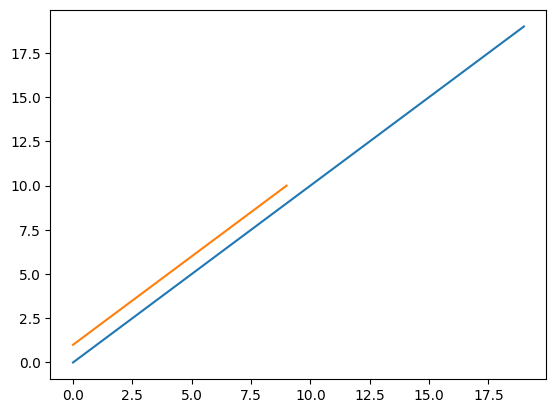

In [86]:
from matplotlib import pyplot as plt
plt.plot(range(20), range(20))
plt.plot(range(10), [x+1 for x in range(10)])
plt.show()

You can even have interactive charts with altair.  Please note that all interactive plotting libraries may not work due to collisions between the static site generator and the plotting library.  If you encounter issues, we suggest saving your plot as an image file to disk then displaying it with a markdown cell.

### Interactive Plots

In [ ]:
import altair as alt
from vega_datasets import data

source = data.cars()

alt.Chart(source).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
)

:::caution

You should be careful when using interactive plots.  Interactive pltos can inject lots of HTML into the page, which can slow things down significantly.  Only create interactive charts when they are helpful.

You can instruct altair to render a chart as a static svg image with this line of code.

```python
alt.renderers.enable('svg')
```

_In order for this to work, you will have to install the [altair_saver](https://github.com/altair-viz/altair_saver) package._



:::

Here is the same chart as a static image:

In [ ]:
#notest
import altair as alt
from vega_datasets import data

source = data.cars()

alt.renderers.enable('svg')
alt.Chart(source).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
)

## Running Tests & Updating Notebooks

See [this README section](https://github.com/outerbounds/docs#running-tests--updating-notebooks) for more information on this topic.
